In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from datetime import datetime
from scipy import stats
from statsmodels import robust
from seaborn import boxplot
from seaborn import lmplot
%matplotlib inline

In [75]:
df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto19/CasosActivosPorComuna.csv?raw=true', sep=',')
df.head()
#carga la data de producto19 que contiene los casos activos por comuna para todo chile

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06
0,Arica y Parinacota,15,Arica,15101.0,247552.0,88.0,80.0,72.0,65.0,77.0,...,156.0,183.0,261.0,267.0,206.0,172.0,118.0,95.0,97.0,74.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,3.0,2.0,2.0,2.0,7.0,11.0,12.0,9.0


In [76]:
df2 = df.loc[df.loc[:, 'Comuna'] == 'Las Condes']
df2
#se buscan los datos que corresponden a la comuna de Las Condes

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06
114,Metropolitana,13,Las Condes,13114.0,330759.0,47.0,38.0,37.0,34.0,41.0,...,246.0,283.0,279.0,207.0,176.0,145.0,98.0,76.0,56.0,46.0


In [77]:
df3 = df2.drop(['Region','Codigo region','Codigo comuna', 'Poblacion'], axis = 1)
df3
#Se borran las columnas que no son de interes y se deja solo la comuna y las fechas.

,Comuna,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,2020-05-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06
114,Las Condes,47.0,38.0,37.0,34.0,41.0,37.0,80.0,133.0,235.0,...,246.0,283.0,279.0,207.0,176.0,145.0,98.0,76.0,56.0,46.0


In [78]:
df4 = df3.groupby('Comuna').sum()
df4
#Se agrupan los datos por la comuna de las condes y asi se elimina la primera columna.

,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,2020-05-08,2020-05-11,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,2021-12-06
Comuna,,,,,,,,,,,,,,,,,,,,,
Las Condes,47.0,38.0,37.0,34.0,41.0,37.0,80.0,133.0,235.0,287.0,...,246.0,283.0,279.0,207.0,176.0,145.0,98.0,76.0,56.0,46.0


In [79]:
df5 = df4.transpose()
df5
#se usa la matriz traspuesta para poder facilitar la elaboración del gráfico.

Comuna,Las Condes
2020-04-13,47.0
2020-04-15,38.0
2020-04-17,37.0
2020-04-20,34.0
2020-04-24,41.0
...,...
2021-11-22,145.0
2021-11-26,98.0
2021-11-29,76.0
2021-12-03,56.0


In [80]:
df5.reset_index(level=0, inplace=True)
df5.head()
#Se resetea la primera columna con el fin de poder dar el formato de fecha a la columna de fechas.

Comuna,index,Las Condes
0,2020-04-13,47.0
1,2020-04-15,38.0
2,2020-04-17,37.0
3,2020-04-20,34.0
4,2020-04-24,41.0


In [84]:
df6 = df5.rename(columns={'index':'Fecha'})
df7 = df6.rename(columns={'Las Condes':'Casos Activos'})
df7
#se renombran las columnas con fin puramente estético.

Comuna,Fecha,Casos Activos
0,2020-04-13,47.0
1,2020-04-15,38.0
2,2020-04-17,37.0
3,2020-04-20,34.0
4,2020-04-24,41.0
...,...,...
168,2021-11-22,145.0
169,2021-11-26,98.0
170,2021-11-29,76.0
171,2021-12-03,56.0


In [85]:
df7['Fecha'] = pd.to_datetime(df7['Fecha'], errors = 'coerce')
df7.head()
#Se entrega el formato de fecha a la columna 'Fecha'

Comuna,Fecha,Casos Activos
0,2020-04-13,47.0
1,2020-04-15,38.0
2,2020-04-17,37.0
3,2020-04-20,34.0
4,2020-04-24,41.0


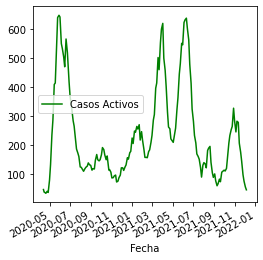

In [106]:
Grafico = df7.plot(x='Fecha', y='Casos Activos', kind="line",figsize=(4,4), color = 'g')
#Gráfico de apoyo para el analisis posterior.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Casos Activos'>

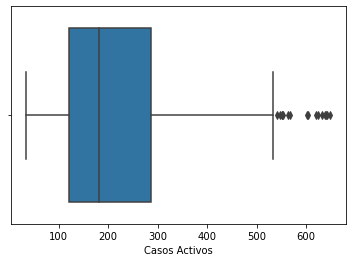

In [107]:
boxplot(df7['Casos Activos'])
#Boxplot que nos muestra que si existen datos fuera de lo normal.

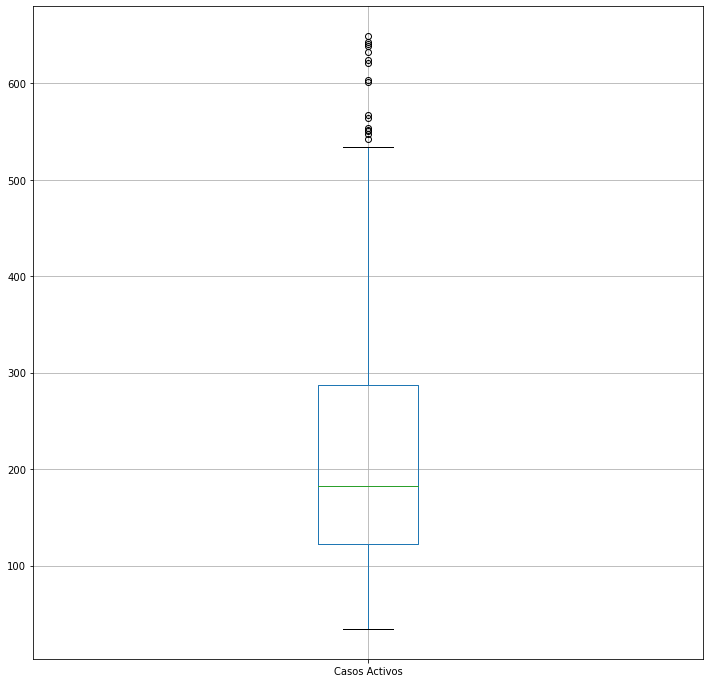

In [98]:
ANTOF = df7.boxplot('Casos Activos',figsize=(12,12))
#Gráfico que complementa el análisis.

In [ ]:
#Como se pudo observar en los gráficos, si existieron outliers en los casos activos en la comuna de las condes, ya que hay datos muy extremos